----------------   INSTALLATION OF TENSORFLOW  ---------------------

In [ ]:
!pip install tensorflow



In [2]:
!pip install keras


--------------1. IMPORT OF LIBRARIES ---------------------------

In [10]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten


------------------- 2. UPLOAD OF DATA SET ------------------

In [12]:
X_train = np.loadtxt('input.csv' ,delimiter=',')
Y_train = np.loadtxt('labels.csv' ,delimiter=',')

X_test = np.loadtxt('input_test.csv' ,delimiter=',')
Y_test = np.loadtxt('labels_test.csv' ,delimiter=',')

--------------------- 3. PREPROCESSING STEPS --------------------------

In [13]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train =X_train/255.0
X_test = X_test/255.0

In [14]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [15]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

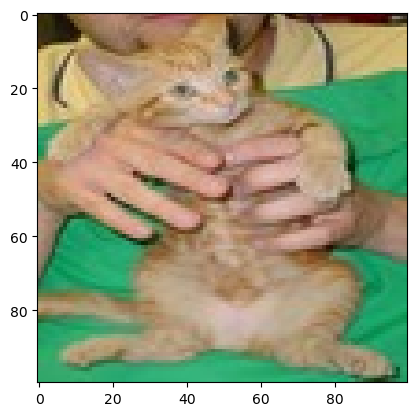

In [16]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

---------------------  4. MODELLING ARCHITECTURE ------------------------------------

In [17]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu' ,input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu' ))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))

C:\Users\gokul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------ 5 . TRAINING OF DATA(A) ---------------------------------

In [60]:

model.compile(loss = 'MeanSquaredError',optimizer = 'adam' ,metrics =['accuracy'])

In [62]:
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9328 - loss: 0.0484
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 1.0000 - loss: 2.1126e-04
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 1.0000 - loss: 1.2279e-04
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 1.0000 - loss: 6.8528e-05
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 1.0000 - loss: 6.7503e-05
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 1.0000 - loss: 5.4540e-05
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 1.0000 - loss: 4.1725e-05
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 1.0000 - loss: 4.6749e-05
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 1.0000 - loss: 3.2353e-05


------------------ 6. MODEL EVALUTION(A) --------------------------------------

In [64]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6703 - loss: 0.2945


[0.2690486013889313, 0.6899999976158142]

--------------------- 7 . RESULT(A) -----------------------------------

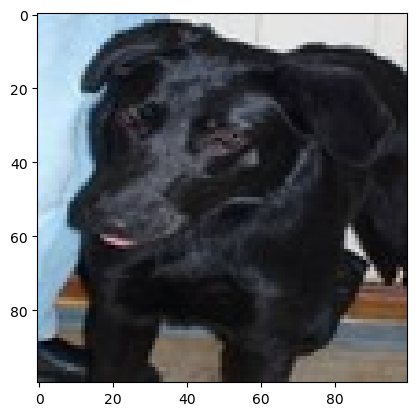

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Our model says it is a : cat


In [80]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :",pred)

------------------- 5 . TRAINING OF DATA(B) ----------------------------------

In [82]:

model.compile(loss = 'BinaryCrossentropy',optimizer = 'adam' ,metrics =['accuracy'])

In [86]:
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9762 - loss: 0.0694
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 1.0000 - loss: 0.0069
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 1.0000 - loss: 9.6053e-04
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 1.0000 - loss: 7.6535e-04
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 1.0000 - loss: 6.7994e-04
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 1.0000 - loss: 5.9589e-04
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 1.0000 - loss: 5.6155e-04


-------------------- 6 . MODEL EVALUTION(B) ------------------------------

In [88]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6638 - loss: 2.2738


[2.006049633026123, 0.6899999976158142]

---------------- 7 . RESULT(B) ----------------------------

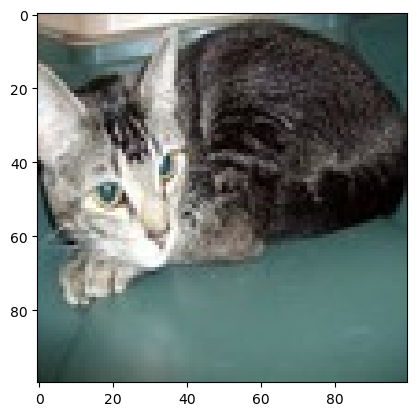

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Our model says it is a : dog


In [94]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :",pred)